In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals
import random

In [108]:
def generate_matrix_uniform(n: int) -> np.ndarray:
    """
    Generates an n by n matrix with diagonals as 0 and other elements between -1 and 1.

    Args:
    n (int): The size of the matrix.

    Returns:
    np.ndarray: An n by n matrix with diagonals as 0 and other elements between -1 and 1.
    """
    assert isinstance(n, int) and n > 0, "n should be a positive integer"
    matrix = np.random.uniform(-1, 1, (n, n))
    np.fill_diagonal(matrix, 1)
    return matrix

def generate_matrix_normal(n: int, mu, sigma) -> np.ndarray:
    """
    Generates an n by n matrix with diagonals as 1 and other elements normally distributed with mean mu and variance sigma.

    Args:
    n (int): The size of the matrix.
    mu (float): The mean of the normal distribution.
    sigma (float): The standard deviation of the normal distribution.

    Returns:
    np.ndarray: An n by n matrix with diagonals as 1 and other elements normally distributed with mean mu and variance sigma.
    """
    assert isinstance(n, int) and n > 0, "n should be a positive integer"
    matrix = np.random.normal(mu, sigma, (n, n))
    np.fill_diagonal(matrix, 1)
    return matrix


def choose_random_subset(n: int, k: int) -> list:
    """
    Chooses a random subset of k numbers from 0 to n (inclusive).

    Args:
    n (int): The maximum number to choose from.
    k (int): The number of elements to choose.

    Returns:
    list: A list of k random numbers between 0 and n (inclusive).
    """
    assert isinstance(n, int) and n >= 0, "n should be a non-negative integer"
    assert isinstance(k, int) and k >= 0, "k should be a non-negative integer"
    assert k <= n, "k should be less than or equal to n"
    return random.sample(range(n), k)


def compute_det(matrix: np.ndarray, rows: list, cols: list) -> float:
    """
    Computes the determinant of the principal minor of a matrix.

    Args:
    matrix (np.ndarray): The matrix to compute the determinant of.
    rows (list): The rows of the principal minor.
    cols (list): The columns of the principal minor.

    Returns:
    float: The determinant of the principal minor of the matrix.
    """
    assert isinstance(matrix, np.ndarray), "matrix should be a numpy array"
    assert isinstance(rows, list) and isinstance(cols, list), "rows and cols should be lists"
    assert all(isinstance(i, int) for i in rows) and all(isinstance(i, int) for i in cols), "rows and cols should contain integers"
    assert all(0 <= i < matrix.shape[0] for i in rows) and all(0 <= i < matrix.shape[1] for i in cols), "rows and cols should be valid indices for matrix"
    minor = matrix[np.ix_(rows, cols)]
    return np.linalg.det(minor)

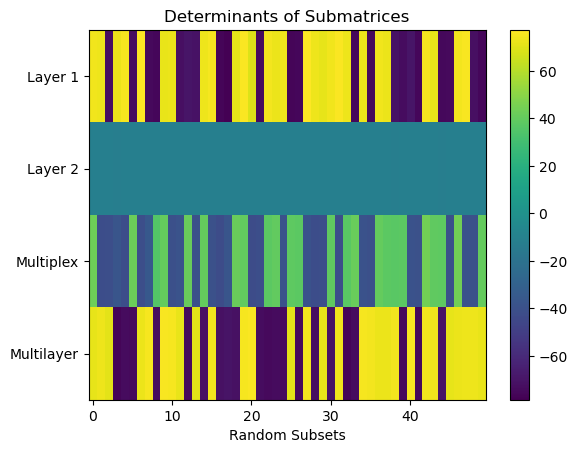

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Generate matrices
n = 100
k = 50

G1 = generate_matrix_normal(n, -0.5, 1)
G2 = generate_matrix_normal(n, 0.25, 0.025)
I = np.identity(n)
I_G1 = G1
I_G2 = G2
I_05G1_05G2 = 0.5 * G1 + 0.5 * G2

# create a block matrix with diagonals as G1 and G2 and nondiagonal block as uniformly generated matrix
G12 = generate_matrix_uniform(n)
np.fill_diagonal(G12, 0)
G21 = generate_matrix_uniform(n)
np.fill_diagonal(G21, 0)
multilayer = np.block([[G1, G12], [G21, G2]])


# Collect determinant values
determinants = []

for matrix_name, matrix in [("I + G1", I_G1), ("I + G2", I_G2), ("I + 0.5G1 + 0.5G2", I_05G1_05G2), ("Multilayer", multilayer)]:
    det_values = []
    for i in range(k):
        subset = choose_random_subset(n, k)
        det = compute_det(matrix, subset, subset)
        det_values.append(det)
    determinants.append(det_values)

# Plotting the heatmap
data = np.array(determinants)
data = np.sign(data) * np.log(np.abs(data)) # making the difference between negavie and positive more visible
plt.imshow(data, cmap='viridis', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(4), ["Layer 1", "Layer 2", "Multiplex", "Multilayer"])

plt.colorbar()
plt.title('Determinants of Submatrices')
plt.xlabel('Random Subsets')
# plt.ylabel('Matrices')
plt.savefig('heatmap.png')
plt.show()


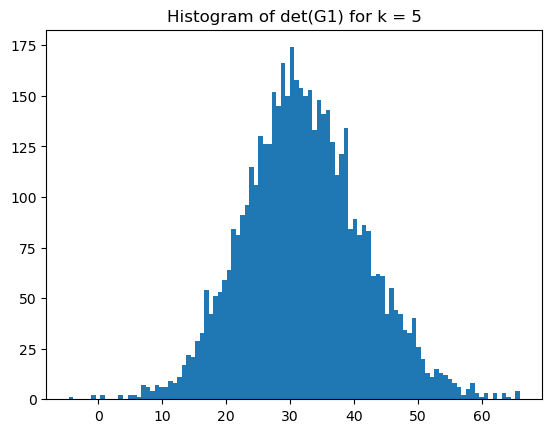

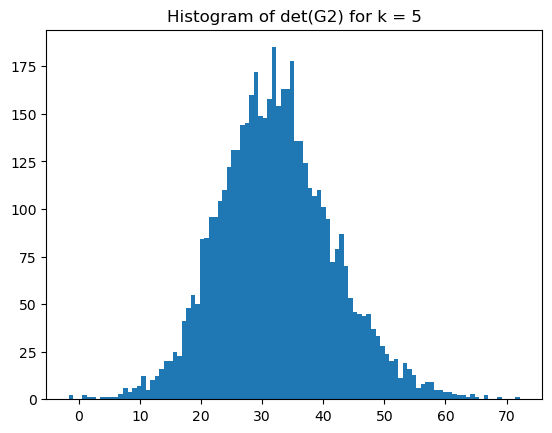

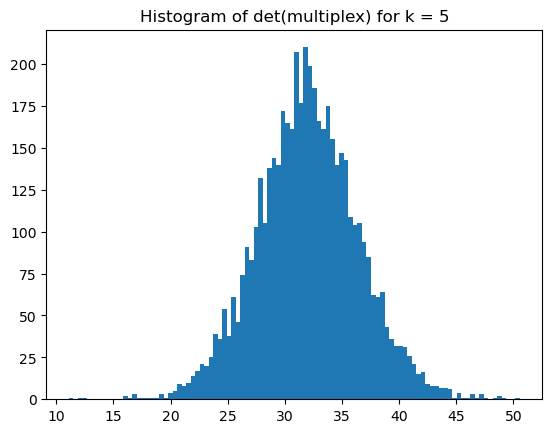

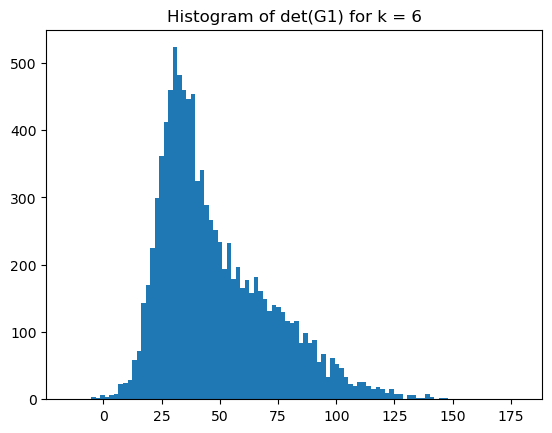

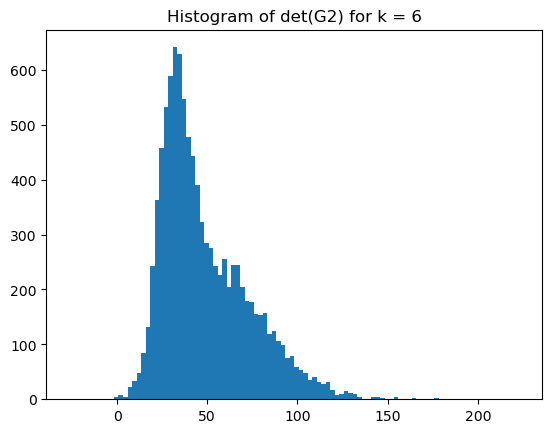

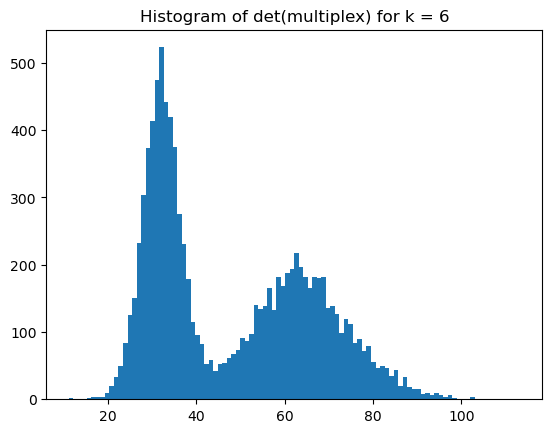

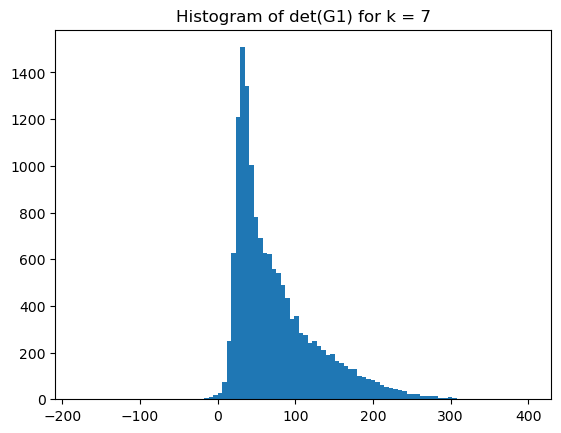

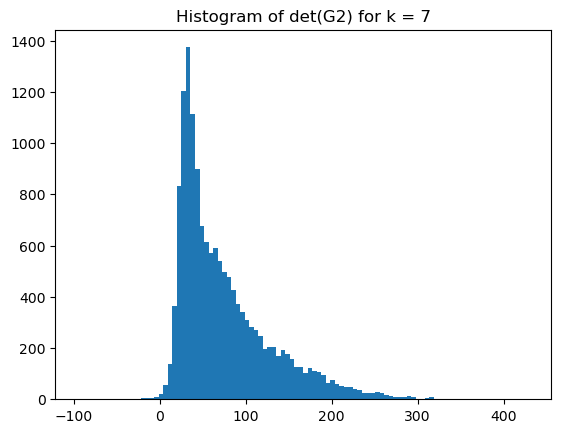

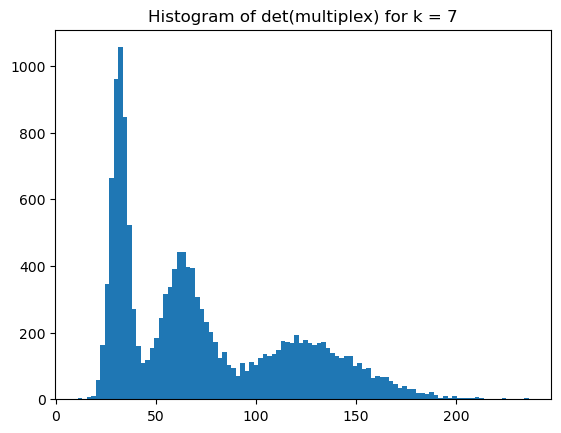

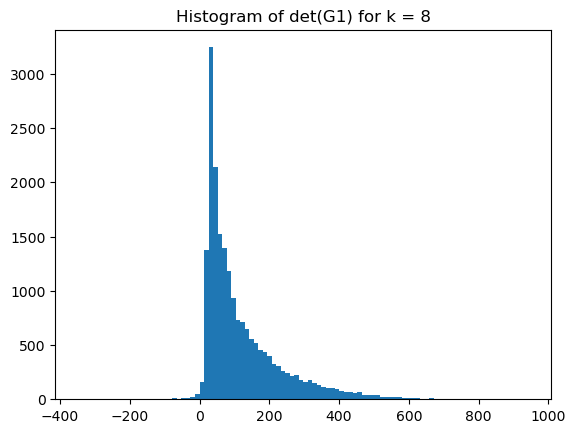

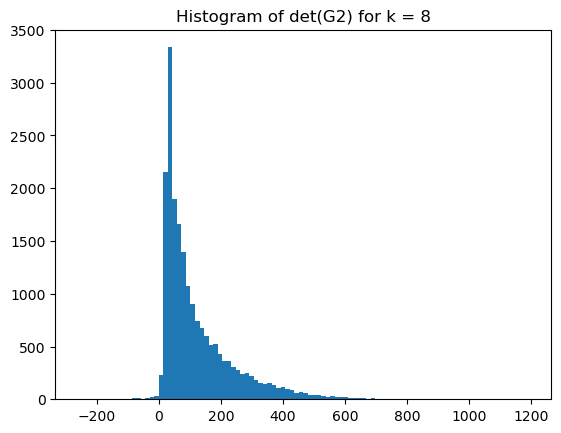

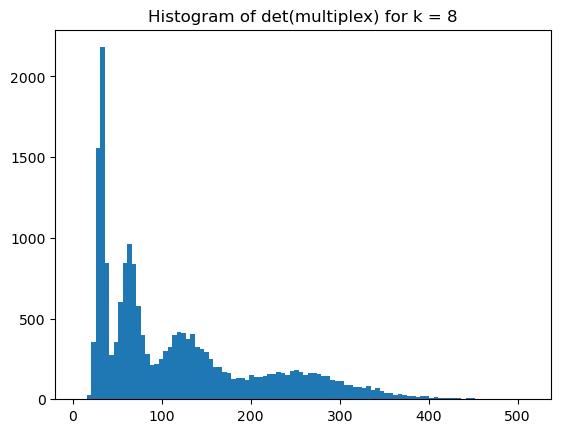

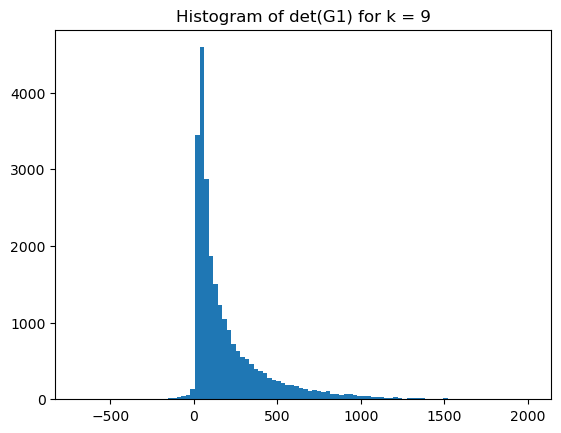

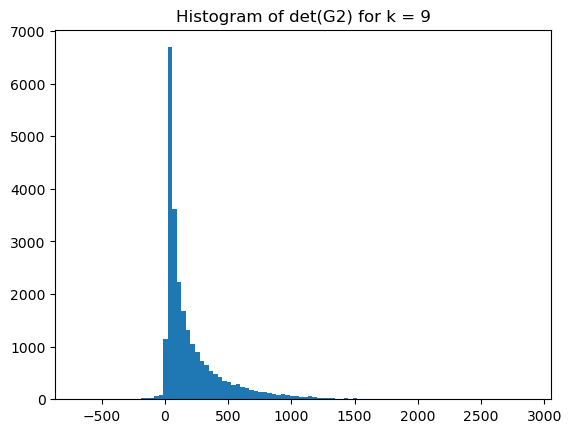

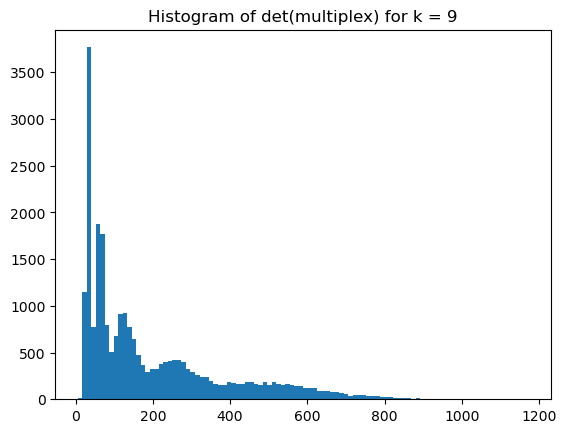

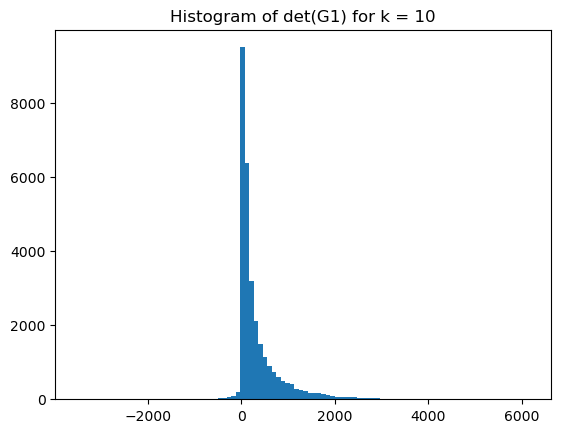

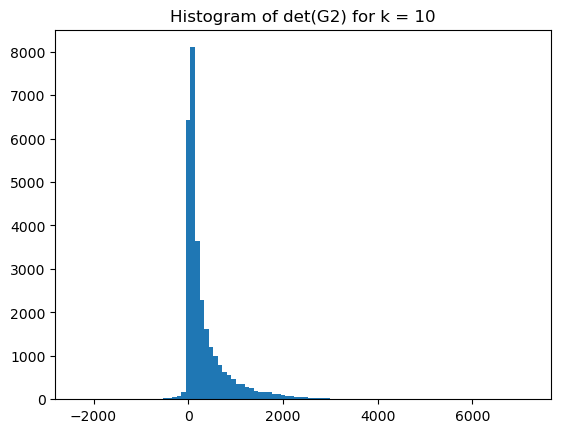

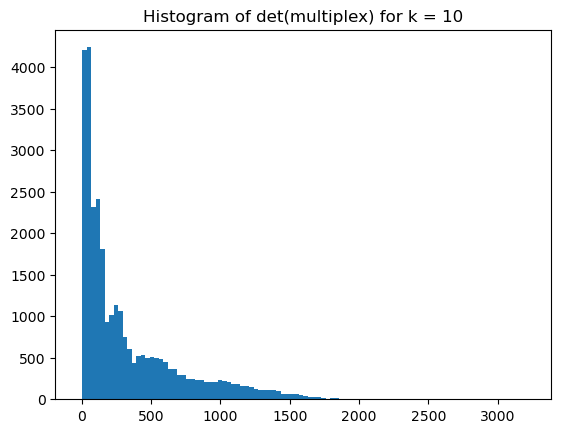

In [29]:
iterations = 5000
n = 100
k_list = [5, 6, 7, 8, 9, 10]
G1 = generate_matrix(n)
G2 = generate_matrix(n)
k1 = 0.5
k2 = 1-k1
multiplex = np.eye(n) + k1*G1 + k2*G2
det1_list = []
det2_list = []
det_sum_list = []
for k in k_list:
    for i in range(iterations):
        random_subset = choose_random_subset(n, k)
        det1 = compute_det(np.eye(n)+G1, random_subset, random_subset)
        det2 = compute_det(np.eye(n)+G2, random_subset, random_subset)
        det_sum = compute_det(multiplex, random_subset, random_subset)
        det1_list.append(det1)
        det2_list.append(det2)
        det_sum_list.append(det_sum)

    plt.hist(det1_list, bins=100)
    plt.title("Histogram of det(G1) for k = {}".format(k))
    plt.show()
    plt.hist(det2_list, bins=100)
    plt.title("Histogram of det(G2) for k = {}".format(k))
    plt.show()
    plt.hist(det_sum_list, bins=100)
    plt.title("Histogram of det(multiplex) for k = {}".format(k))
    plt.show()